# Continued Data Wrangling/EDA on Kershaw 2015

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling
from library.sb_utils import save_file
import numpy as np
%matplotlib inline

In [2]:
import datetime as dt
from datetime import datetime

## Import data

In [3]:
Kershaw2015 = pd.read_csv('../data/interim/Kershaw2015.csv')

In [4]:
Kershaw2015.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pcodes
0,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,4,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
2,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,5,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0
3,2015000769,519083,Strikeout,201500012,1,1,0,L,477132,R,...,8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2015000769,519083,Strikeout,201500012,1,1,0,L,477132,R,...,9,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0


In [5]:
Kershaw2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ab_id       3392 non-null   int64  
 1   batter_id   3392 non-null   int64  
 2   event       3392 non-null   object 
 3   g_id        3392 non-null   int64  
 4   inning      3392 non-null   int64  
 5   o           3392 non-null   int64  
 6   p_score     3392 non-null   int64  
 7   p_throws    3392 non-null   object 
 8   pitcher_id  3392 non-null   int64  
 9   stand       3392 non-null   object 
 10  top         3392 non-null   bool   
 11  date        3392 non-null   object 
 12  code        3392 non-null   object 
 13  type        3392 non-null   object 
 14  pitch_type  3386 non-null   object 
 15  event_num   3392 non-null   int64  
 16  b_score     3392 non-null   float64
 17  b_count     3392 non-null   float64
 18  s_count     3392 non-null   float64
 19  outs        3392 non-null  

Text(0.5, 1.0, 'Distribution of pitches  (Clayton Kershaw 2015)')

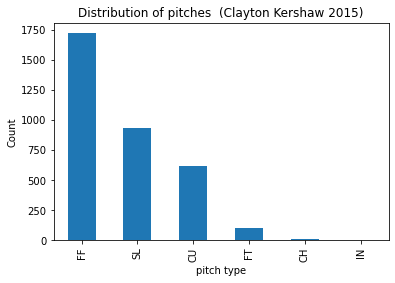

In [6]:
Kershaw2015.pitch_type.value_counts().plot(kind='bar')
plt.xlabel('pitch type')
plt.ylabel('Count')
plt.title('Distribution of pitches  (Clayton Kershaw 2015)')
#plt.plot()

### Lets look at pitch distributions for each count, as well as r/l splits

In [7]:
Kershaw2015.b_count.value_counts()

0.0    1664
1.0    1019
2.0     505
3.0     204
Name: b_count, dtype: int64

In [8]:
Kershaw2015.s_count.value_counts()

0.0    1286
2.0    1061
1.0    1045
Name: s_count, dtype: int64

In [9]:
#df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)
Kershaw2015['bs'] = list(Kershaw2015[['b_count','s_count']].to_records(index=False))

In [10]:
Kershaw2015.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pcodes,bs
0,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"[0.0, 0.0]"
1,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,"[0.0, 1.0]"
2,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,"[0.0, 2.0]"
3,2015000769,519083,Strikeout,201500012,1,1,0,L,477132,R,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,"[0.0, 0.0]"
4,2015000769,519083,Strikeout,201500012,1,1,0,L,477132,R,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,"[1.0, 0.0]"


In [11]:
Kershaw2015.bs.value_counts()

TypeError: unhashable type: 'writeable void-scalar'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'writeable void-scalar'


[0.0, 0.0]    897
[0.0, 1.0]    488
[1.0, 2.0]    377
[1.0, 1.0]    355
[1.0, 0.0]    287
[0.0, 2.0]    279
[2.0, 2.0]    276
[2.0, 1.0]    149
[3.0, 2.0]    129
[2.0, 0.0]     80
[3.0, 1.0]     53
[3.0, 0.0]     22
Name: bs, dtype: int64

In [12]:
k15 = Kershaw2015.loc[:, Kershaw2015.columns != 'bs']

In [13]:
k15

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pcodes
0,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,4,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
2,2015000768,571976,Hit By Pitch,201500012,1,0,0,L,477132,R,...,5,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0
3,2015000769,519083,Strikeout,201500012,1,1,0,L,477132,R,...,8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2015000769,519083,Strikeout,201500012,1,1,0,L,477132,R,...,9,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2015183800,576397,Single,201502425,4,2,2,L,477132,R,...,206,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0
3388,2015183800,576397,Single,201502425,4,2,2,L,477132,R,...,207,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0
3389,2015183800,576397,Single,201502425,4,2,2,L,477132,R,...,208,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0
3390,2015183800,576397,Single,201502425,4,2,2,L,477132,R,...,209,0.0,2.0,1.0,2.0,4.0,0.0,0.0,0.0,1.0


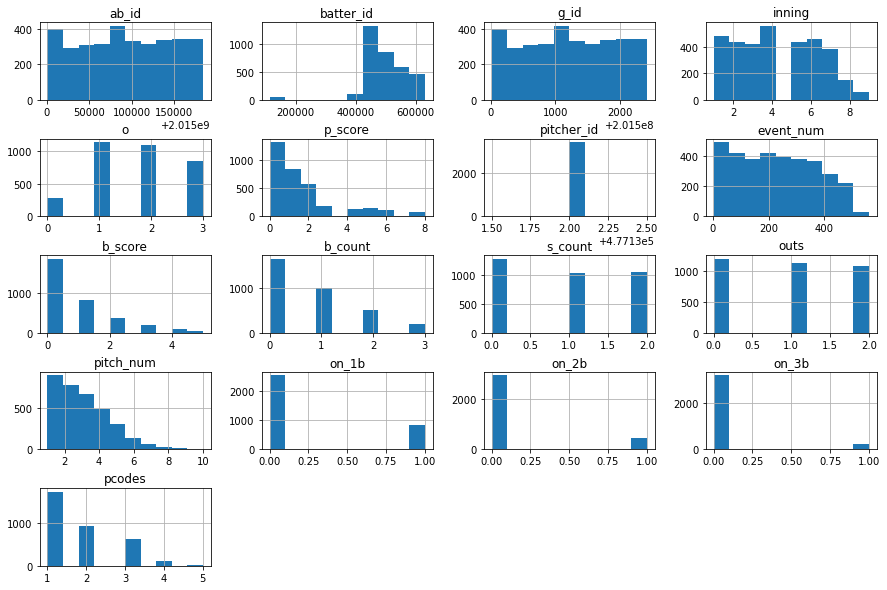

In [14]:
k15.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

In [15]:
#countdict = {[0.0, 0.0] : 100, [0.0, 1.0] : 101, [1.0, 2.0] : 112, :}

In [16]:
ballsstrikes = Kershaw2015.groupby(by = ['b_count', 's_count'])

In [17]:
ballsstrikes.count().reset_index()

,b_count,s_count,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,...,pitch_type,event_num,b_score,outs,pitch_num,on_1b,on_2b,on_3b,pcodes,bs
0,0.0,0.0,897,897,897,897,897,897,897,897,...,896,897,897,897,897,897,897,897,896,897
1,0.0,1.0,488,488,488,488,488,488,488,488,...,488,488,488,488,488,488,488,488,488,488
2,0.0,2.0,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
3,1.0,0.0,287,287,287,287,287,287,287,287,...,286,287,287,287,287,287,287,287,286,287
4,1.0,1.0,355,355,355,355,355,355,355,355,...,354,355,355,355,355,355,355,355,354,355
5,1.0,2.0,377,377,377,377,377,377,377,377,...,375,377,377,377,377,377,377,377,375,377
6,2.0,0.0,80,80,80,80,80,80,80,80,...,79,80,80,80,80,80,80,80,79,80
7,2.0,1.0,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
8,2.0,2.0,276,276,276,276,276,276,276,276,...,276,276,276,276,276,276,276,276,276,276
9,3.0,0.0,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,21,22


<AxesSubplot:ylabel='Frequency'>

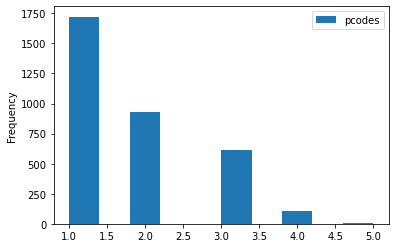

In [18]:
k15.plot(x='b_count', y='pcodes', kind='hist')

<AxesSubplot:ylabel='Frequency'>

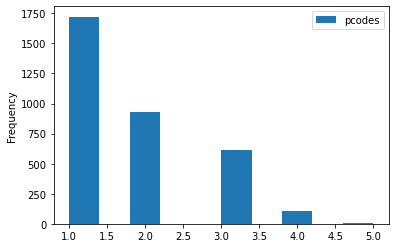

In [19]:
k15.plot(x='s_count', y='pcodes', kind='hist')

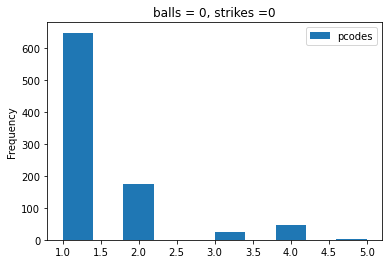

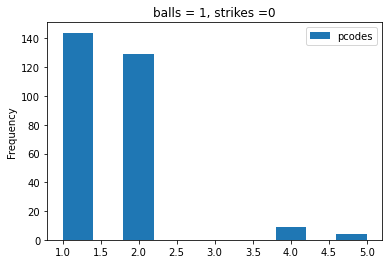

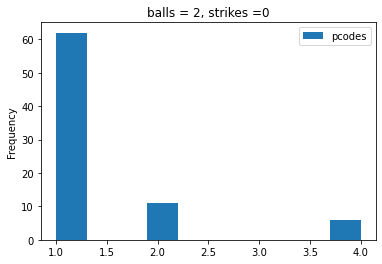

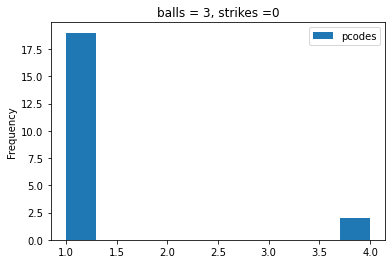

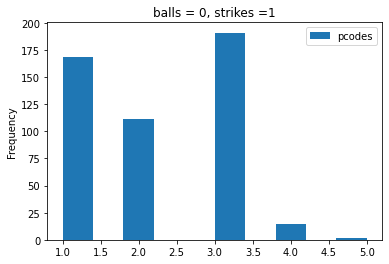

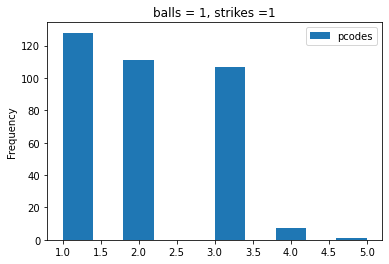

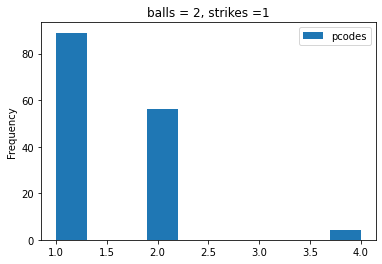

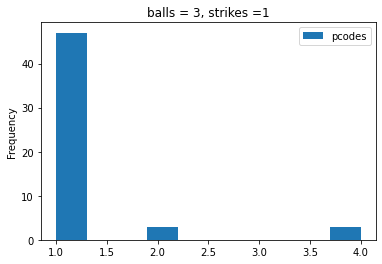

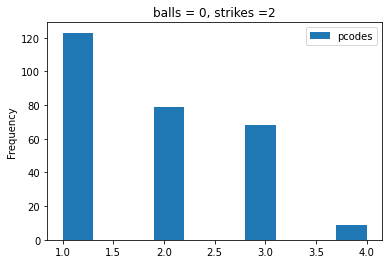

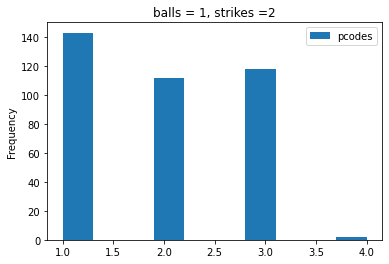

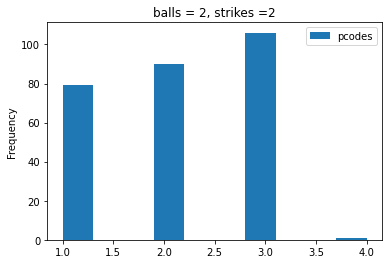

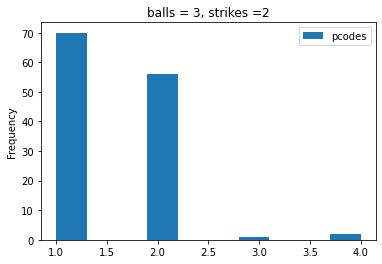

In [30]:
for i in range(3):
    for j in range(4):
        k15[np.logical_and(k15.loc[:, 's_count'].astype(int) == i , k15.loc[:, 'b_count'].astype(int) == j)]\
        .plot(x = 'b_count', y = 'pcodes', kind = 'hist', title = 'balls = ' +str(j)+', strikes =' +str(i)\
             , xlabel = '1.0 = Fourseam , 2.0 = Slider, 3.0 = Curve, 4.0 = 2seam')
        plt.plot()

In [ ]:
 k15[np.logical_and(k15.loc[:, 's_count'].astype(int) == i , k15.loc[:, 'b_count'].astype(int) == j)]

    plt.subplots(figsize=(12, 8))
    sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
    plt.xticks(rotation='vertical')
    plt.ylabel('Price ($)')
    plt.xlabel('State');

    # The next bit simply reorders the index by increasing average of weekday and weekend prices
    # Compare the index order you get from
    # state_price_means.index
    # with
    # state_price_means.mean(axis=1).sort_values(ascending=False).index
    # See how this expression simply sits within the reindex()
    (state_price_means.reindex(index=state_price_means.mean(axis=1)
        .sort_values(ascending=False)
        .index)
        .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
    plt.xlabel('Price ($)');

In [21]:
# k15.plot( kind='bar')

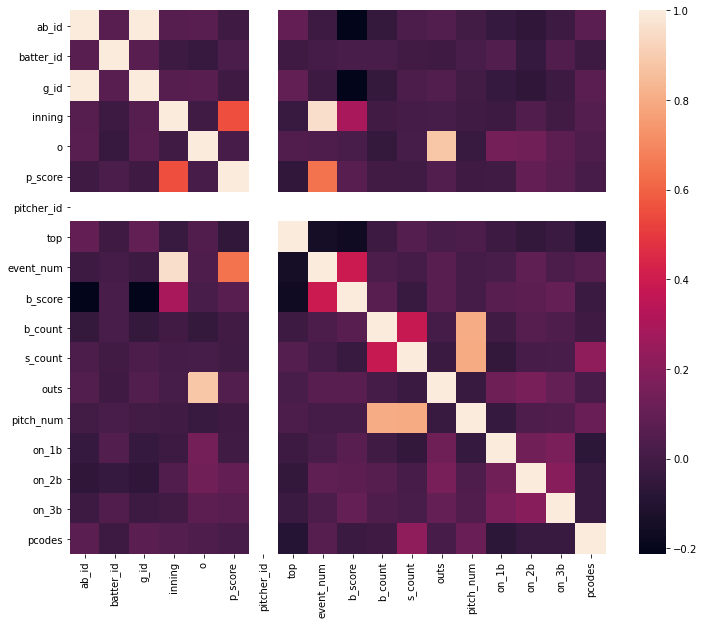

In [22]:
plt.subplots(figsize=(12,10))
sns.heatmap(k15.corr());

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [33]:
k15.dtypes

ab_id           int64
batter_id       int64
event          object
g_id            int64
inning          int64
o               int64
p_score         int64
p_throws       object
pitcher_id      int64
stand          object
top              bool
date           object
code           object
type           object
pitch_type     object
event_num       int64
b_score       float64
b_count       float64
s_count       float64
outs          float64
pitch_num     float64
on_1b         float64
on_2b         float64
on_3b         float64
pcodes        float64
dtype: object

In [40]:
#k15scale = scale(k15)

In [41]:
#https://stackoverflow.com/questions/41022316/pandas-filter-dataframe-with-type-of-data
knums = k15.select_dtypes('number')
knums.head()

,ab_id,batter_id,g_id,inning,o,p_score,pitcher_id,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pcodes
0,2015000768,571976,201500012,1,0,0,477132,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2015000768,571976,201500012,1,0,0,477132,4,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
2,2015000768,571976,201500012,1,0,0,477132,5,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0
3,2015000769,519083,201500012,1,1,0,477132,8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2015000769,519083,201500012,1,1,0,477132,9,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0


In [44]:
k15scale = scale(knums)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [47]:
#https://stackoverflow.com/questions/51741605/standardize-dataset-containing-too-large-values
from sklearn import preprocessing
# Get column names first
names = knums.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
prescaled_df = scaler.fit_transform(knums)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [48]:
scaled_df.head()

,ab_id,batter_id,g_id,inning,o,p_score,pitcher_id,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pcodes
0,-1.692262,1.005177,-1.693806,-1.469912,-1.875930,-0.798155,0.0,-1.609795,-0.707277,-0.854110,-1.126027,-1.181552,-1.095118,-0.578712,-0.383041,-0.261432,-0.845927
1,-1.692262,1.005177,-1.693806,-1.469912,-1.875930,-0.798155,0.0,-1.602696,-0.707277,-0.854110,0.079999,-1.181552,-0.500204,-0.578712,-0.383041,-0.261432,-0.845927
2,-1.692262,1.005177,-1.693806,-1.469912,-1.875930,-0.798155,0.0,-1.595598,-0.707277,-0.854110,1.286025,-1.181552,0.094709,-0.578712,-0.383041,-0.261432,-0.845927
3,-1.692244,0.301719,-1.693806,-1.469912,-0.801799,-0.798155,0.0,-1.574302,-0.707277,-0.854110,-1.126027,-1.181552,-1.095118,1.727975,-0.383041,-0.261432,-0.845927
4,-1.692244,0.301719,-1.693806,-1.469912,-0.801799,-0.798155,0.0,-1.567203,-0.707277,0.242877,-1.126027,-1.181552,-0.500204,1.727975,-0.383041,-0.261432,-0.845927


In [49]:
prescaled_df

array([[-1.69226216,  1.00517651, -1.69380601, ..., -0.38304146,
        -0.26143155, -0.84592709],
       [-1.69226216,  1.00517651, -1.69380601, ..., -0.38304146,
        -0.26143155, -0.84592709],
       [-1.69226216,  1.00517651, -1.69380601, ..., -0.38304146,
        -0.26143155, -0.84592709],
       ...,
       [ 1.71123683,  1.0639742 ,  1.7044464 , ..., -0.38304146,
        -0.26143155, -0.84592709],
       [ 1.71123683,  1.0639742 ,  1.7044464 , ..., -0.38304146,
        -0.26143155, -0.84592709],
       [ 1.71123683,  1.0639742 ,  1.7044464 , ..., -0.38304146,
        -0.26143155, -0.84592709]])

In [50]:
scaled_df.mean()

ab_id        -1.255243e-12
batter_id    -2.137965e-16
g_id         -1.188956e-11
inning        6.138875e-16
o             9.859448e-16
p_score      -3.215457e-16
pitcher_id    0.000000e+00
event_num    -4.857226e-17
b_score      -3.996017e-15
b_count      -1.805422e-16
s_count       8.180121e-16
outs         -6.028982e-16
pitch_num     4.883410e-17
on_1b         1.457168e-16
on_2b         8.338783e-16
on_3b         5.964503e-16
pcodes        3.911527e-16
dtype: float64

In [51]:
scaled_df.std()

ab_id         1.000147
batter_id     1.000147
g_id          1.000147
inning        1.000147
o             1.000147
p_score       1.000147
pitcher_id    0.000000
event_num     1.000147
b_score       1.000147
b_count       1.000147
s_count       1.000147
outs          1.000147
pitch_num     1.000147
on_1b         1.000147
on_2b         1.000147
on_3b         1.000147
pcodes        1.000148
dtype: float64

In [56]:
#https://datascience.stackexchange.com/questions/11928/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtypefloat32
k15scale = scaled_df.fillna(scaled_df.mean())
k15PCA = PCA().fit(k15scale)

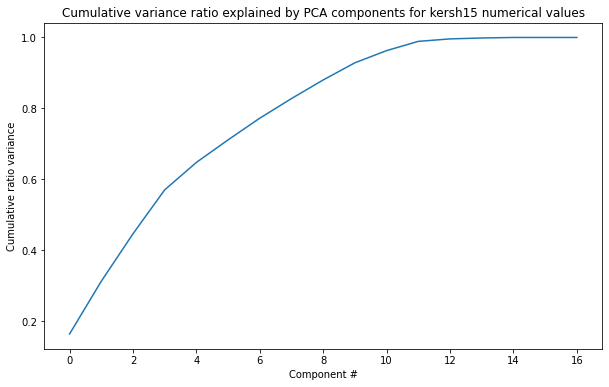

In [57]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(k15PCA.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for kersh15 numerical values');

In [71]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'pcodes', data=knums, alpha=0.2)
        ax.set(xlabel=col, ylabel='pitch type')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [102]:
#switching axis
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots2(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'pcodes', y = col, data=knums, alpha=0.1, s = 100)
        ax.set(xlabel='pitch_type', ylabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [96]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [x for x in knums.columns if x not in ['ab_id','g_id','pitcher_id', 'batter_id']]

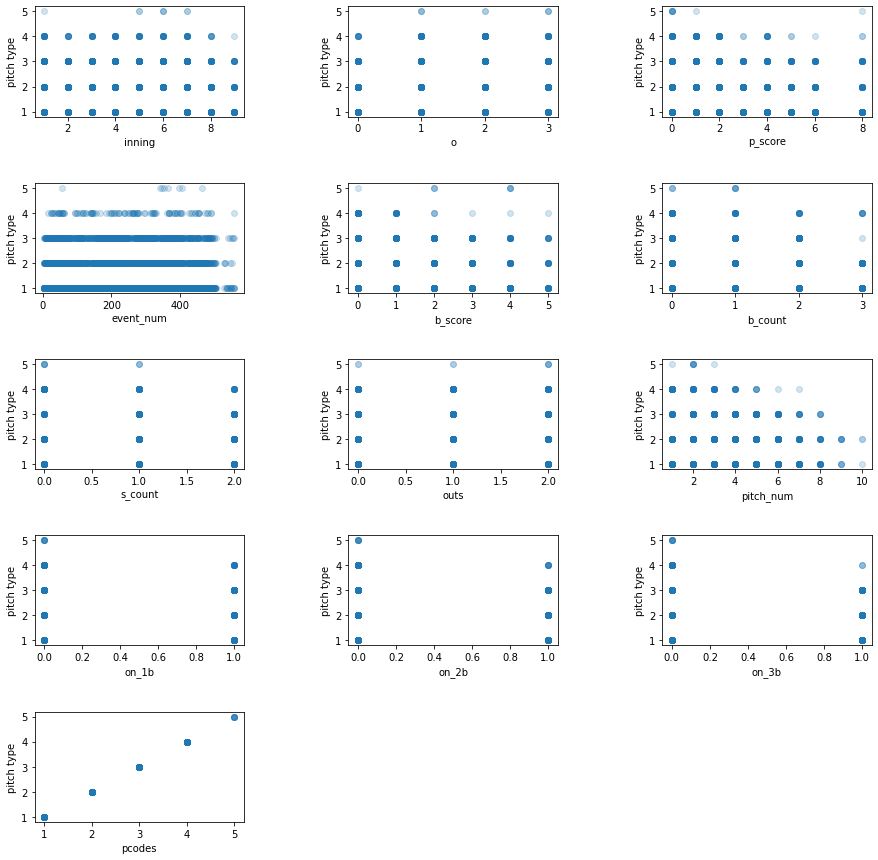

In [98]:
scatterplots(features, ncol = 3, figsize = (15,15))

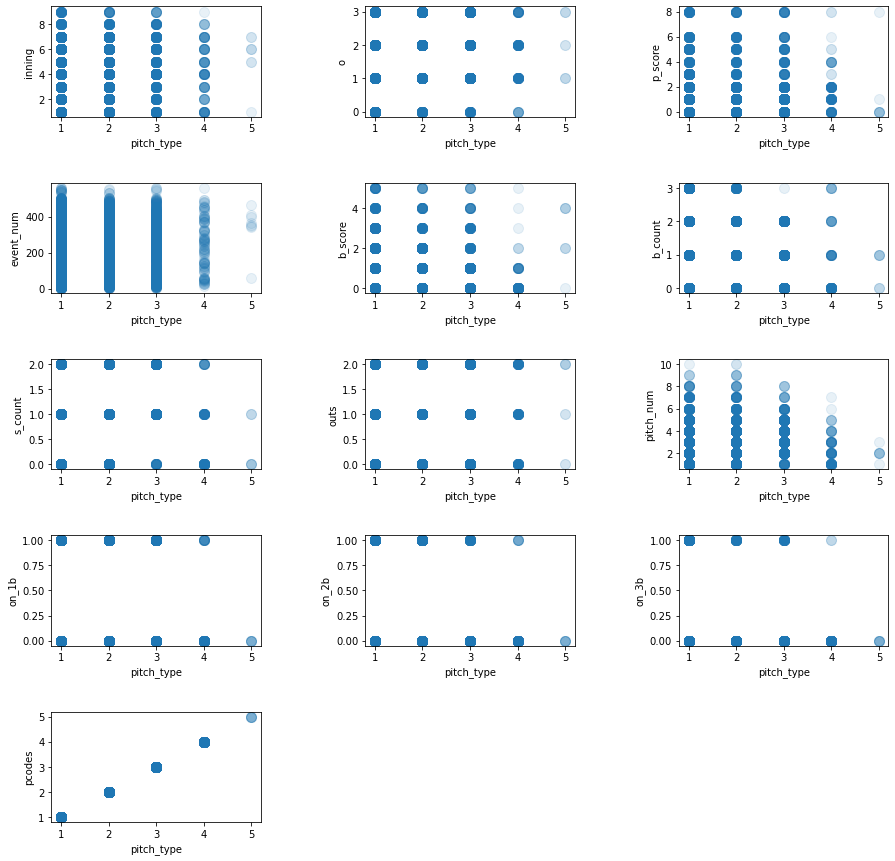

In [103]:
scatterplots2(features, ncol = 3, figsize=(15, 15))

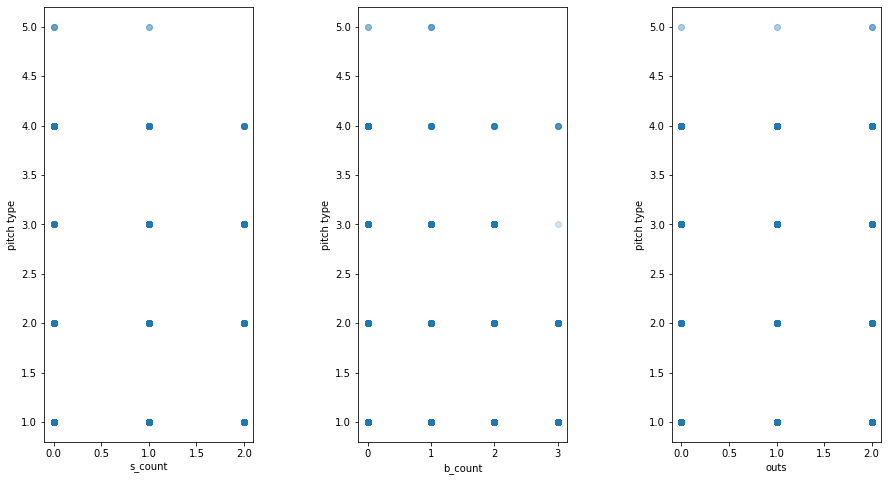

In [104]:
scatterplots(['s_count', 'b_count', 'outs'])

In [ ]:
#plot ratio of it to total for each pitch. 
#CURVE w 3 balls